In [82]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from onix.data_tools import get_experiment_data
from onix.analysis.helper import group_and_average_data


In [83]:
def get_average_heights(data_number):
    data, headers = get_experiment_data(data_number)
    detunings_MHz = headers["detunings"].to("MHz").magnitude
    transmissions_avg = group_and_average_data(data["transmissions_avg"], headers["params"]["detect"]["cycles"])
    monitors_avg = group_and_average_data(data["monitors_avg"], headers["params"]["detect"]["cycles"])
    # antihole_avg = transmissions_avg["antihole"]
    rf_avg = transmissions_avg["rf"]
    if "chasm" in transmissions_avg:
        chasm_avg = transmissions_avg["chasm"]
        # antihole_normalized = antihole_avg / chasm_avg
        rf_normalized = rf_avg / chasm_avg
    else:
        chasm_avg = None
        #antihole_normalized = antihole_avg / monitors_avg["antihole"]
        rf_normalized = rf_avg / monitors_avg["rf"]
        antihole_normalized = rf_normalized
    if "lf" in transmissions_avg:
        lf_normalized = transmissions_avg["lf"] / monitors_avg["lf"]
    if headers["params"]["field_plate"]["use"]:
        hat_E = (headers["params"]["field_plate"]["amplitude"] > 0) == (not headers["params"]["field_plate"]["use_opposite_field"])
        hat_probe = headers["params"]["field_plate"]["stark_shift"] > 0
        mask = detunings_MHz > 0
        mask1 = detunings_MHz < 0
        if "lf" in transmissions_avg:
            return (np.array([np.average(antihole_normalized[mask]), np.average(antihole_normalized[mask1])]), 
            np.array([np.average(rf_normalized[mask]), np.average(rf_normalized[mask1])]), 
            np.array([np.average(lf_normalized[mask]), np.average(lf_normalized[mask1])]), headers, (hat_E, hat_probe))
        else:
            return np.array([
                np.average(antihole_normalized[mask]), np.average(antihole_normalized[mask1])
            ]), np.array([np.average(rf_normalized[mask]), np.average(rf_normalized[mask1])]), headers, (hat_E, hat_probe)
    else:
        return np.average(antihole_normalized), np.average(rf_normalized), headers, None
     

def get_voltage_ratios(data_list):
    ratios = []
    ratios2 = []
    headers = []
    E_fields = []
    for kk in data_list:
        h1, h2, header, E_field = get_average_heights(kk)
        ratios.append(h2)
        headers.append(header)
        E_fields.append(E_field)
    return np.ones(len(ratios)), np.array(ratios), headers, E_fields

def get_dictionary_values(dictionary, keys):
    if isinstance(keys, int):
        return dictionary[keys]
    if len(keys) == 1:
        return dictionary[keys[0]]
    return get_dictionary_values(dictionary[keys[0]], keys[1:])

In [96]:
def get_contrast(data_id):
    _, ratios, headers, _ = get_voltage_ratios(data_id)
    ys = 1 / ratios
    total_time = headers[0]["params"]["timetime"]
    return (ys[0, 0] - ys[1, 0])

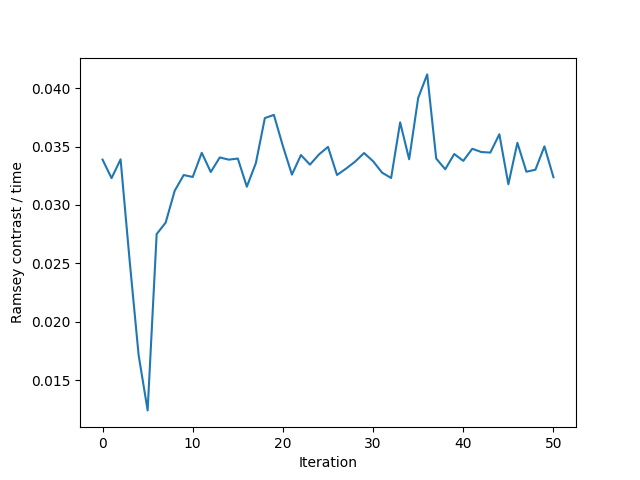

In [97]:
# data_id_0 = [969541-150, 969542-150]
# data_id_0 = [976090, 976091]
data_id_0 = [976146, 976147]
contrasts = []
data_ids = []
N = 51#(976146-976246)//2
for i in range(N):
    data_id = [data_id_0[j]+2*i for j in range(2)]
    contrast = get_contrast(data_id)
    contrasts.append(contrast)
    data_ids.append(data_id)

fig, ax = plt.subplots()
ax.plot(contrasts)
ax.set_ylabel("Ramsey contrast / time")
ax.set_xlabel("Iteration")
plt.show()

In [98]:
data_ids[np.argmax(contrasts)]

[976218, 976219]

In [16]:
np.min(contrasts)

-0.0072384496933049014

In [6]:
data, headers = get_experiment_data(969563)
headers["params"]["chasm"]

{'transitions': ['ac'],
 'scan': 2 <Unit('megahertz')>,
 'durations': 10.0 <Unit('millisecond')>,
 'repeats': 30,
 'detunings': 0 <Unit('megahertz')>,
 'ao_amplitude': 2000.0}

In [7]:
headers["params"]["antihole"]

{'transitions': ['ac', 'cb', 'rf_b'],
 'scan': 1 <Unit('megahertz')>,
 'durations': 6.0 <Unit('millisecond')>,
 'repeats': 100,
 'detunings': 0 <Unit('megahertz')>,
 'ao_amplitude_1': 2000.0000000000002,
 'ao_amplitude_2': 2000.0000000000002,
 'detect_delay': 0 <Unit('millisecond')>,
 'use_hsh': False,
 'ao_amplitude': 2000}

In [8]:
headers["params"]["rf_pump"]

{'use': False,
 'into': 'bbar',
 'amplitude': 4000.0,
 'scan_detunings': {'b': array([-102,   -2]) <Unit('kilohertz')>,
  'bbar': array([-2, 98]) <Unit('kilohertz')>,
  'both': array([-102,   98]) <Unit('kilohertz')>},
 'hsh': {'T_0': 0.1 <Unit('millisecond')>,
  'T_e': 0.05 <Unit('millisecond')>,
  'T_ch': 3 <Unit('millisecond')>}}

In [9]:
get_contrast([975562, 975563])

0.006504598733128808